# Some general explorations of US stock market

*Haiyang Yu, 02/28/2018*



In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

import sys
sys.path.append('../src/utils/')
from configure import *
from mod_dataprep import *

In [2]:
fslist

'http://129.49.67.246/stock/histdata/daily//stocks_list.csv'

In [3]:
ss = pd.read_csv(fslist)
print(format(len(ss)))
ss.head(5)

6791


,Exchange,Symbol,Name,Exist,LastSale,MarketCap,IPOyear,Sector,industry,Start_date,End_date
0,NASDAQ,AABA,Altaba Inc.,1,71.31,$62.28B,NaN,Technology,EDP Services,1996-04-12,2018-02-16
1,NASDAQ,AAL,"American Airlines Group, Inc.",1,50.87,$24.34B,NaN,Transportation,Air Freight/Delivery Services,2005-09-27,2018-02-16
2,NASDAQ,AAME,Atlantic American Corporation,1,3.25,$66.43M,NaN,Finance,Life Insurance,1980-03-17,2018-02-16
3,NASDAQ,AAOI,"Applied Optoelectronics, Inc.",1,29.51,$571.97M,2013.0,Technology,Semiconductors,2013-09-26,2018-02-16
4,NASDAQ,AAON,"AAON, Inc.",1,33.90,$1.78B,NaN,Capital Goods,Industrial Machinery/Components,1992-12-16,2018-02-16


In [4]:
capnum = [capstr2num(x) for x in ss['MarketCap'].values ]
ss['MarketCap'] = capnum
ss[10:16]

,Exchange,Symbol,Name,Exist,LastSale,MarketCap,IPOyear,Sector,industry,Start_date,End_date
10,NASDAQ,ABAX,"ABAXIS, Inc.",1,65.510,1.490000e+09,1992.0,Capital Goods,Industrial Machinery/Components,1992-01-23,2018-02-16
11,NASDAQ,ABCB,Ameris Bancorp,1,52.600,1.970000e+09,1994.0,Finance,Major Banks,1994-05-19,2018-02-16
12,NASDAQ,ABCD,"Cambium Learning Group, Inc.",1,7.190,3.355600e+08,NaN,Consumer Services,Publishing,2009-12-09,2018-02-16
13,NASDAQ,ABDC,Alcentra Capital Corp.,1,7.585,1.080500e+08,NaN,NaN,NaN,2014-05-09,2018-02-16
14,NASDAQ,ABEO,Abeona Therapeutics Inc.,1,11.900,5.566300e+08,NaN,Health Care,Major Pharmaceuticals,1980-09-19,2018-02-16
15,NASDAQ,ABEOW,Abeona Therapeutics Inc.,0,7.200,NaN,NaN,Health Care,Major Pharmaceuticals,---,---


In [5]:
ss.groupby('Exchange').sum()[  ['Exist', 'MarketCap'] ]

,Exist,MarketCap
Exchange,,
AMEX,311,1.243298e+11
NASDAQ,3179,1.324625e+13
NYSE,2624,2.882822e+13


In [6]:
x = ss.groupby(['Sector'] ).sum()[  ['Exist', 'MarketCap'] ]
x

,Exist,MarketCap
Sector,,
Basic Industries,317,2.114924e+12
Capital Goods,374,2.696630e+12
Consumer Durables,139,4.221904e+11
Consumer Non-Durables,231,2.461541e+12
Consumer Services,815,5.644795e+12
Energy,314,3.011629e+12
Finance,964,6.609852e+12
Health Care,792,4.911471e+12
Miscellaneous,145,1.694822e+12


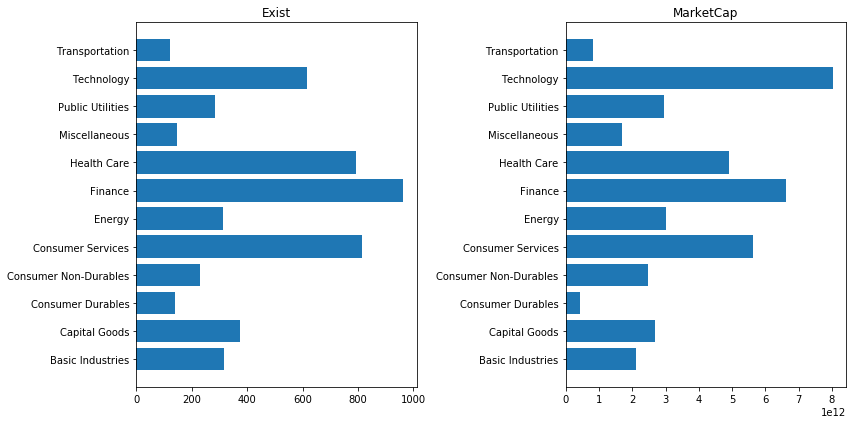

Index(['Exist', 'MarketCap'], dtype='object')


In [7]:
plt.figure(1, figsize=(12, 6))
for i in range(len(x.columns)):
    plt.subplot(1,2,i+1)
    plt.barh( range(len(x)), x[x.columns[i]].values)
    plt.yticks(range(len(x)), x.index.values)
    plt.title(x.columns[i])

plt.tight_layout()
plt.show()

print(x.columns[:])

In [8]:
x0 = ss.groupby(['Exchange','Sector'] ).sum()[  ['Exist', 'MarketCap'] ]
x0

Exist     MarketCap
Exchange Sector                                    
AMEX     Basic Industries          47  1.576230e+10
         Capital Goods             20  1.411580e+09
         Consumer Durables          4  1.037290e+09
         Consumer Non-Durables     14  1.085460e+09
         Consumer Services         31  4.805780e+09
         Energy                    30  3.104964e+10
         Finance                   14  9.699550e+09
         Health Care               45  4.100748e+09
         Miscellaneous              5  4.191700e+08
         Public Utilities          10  3.756446e+10
         Technology                19  1.089280e+09
         Transportation             1  1.781200e+08
NASDAQ   Basic Industries          75  6.747245e+10
         Capital Goods            171  3.089218e+11
         Consumer Durables         77  7.015999e+10
         Consumer Non-Durables    110  4.688188e+11
         Consumer Services        345  2.380882e+12
         Energy                    63  5.829792e+10
         Finance                  612  8.389700e+11
         Health Care              644  1.584755e+12
         Miscellaneous             90  3.976825e+11
         Public Utilities          65  3.032724e+11
         Technology               434  6.126930e+12
         Transportation            53  1.950675e+11
NYSE     Basic Industries         195  2.031690e+12
         Capital Goods            183  2.386297e+12
         Consumer Durables         58  3.509931e+11
         Consumer Non-Durables    107  1.991637e+12
         Consumer Services        439  3.259107e+12
         Energy                   221  2.922281e+12
         Finance                  338  5.761183e+12
         Health Care              103  3.322614e+12
         Miscellaneous             50  1.296720e+12
         Public Utilities         207  2.621781e+12
         Technology               163  1.901215e+12
         Transportation            68  6.316866e+11

/home/oscar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


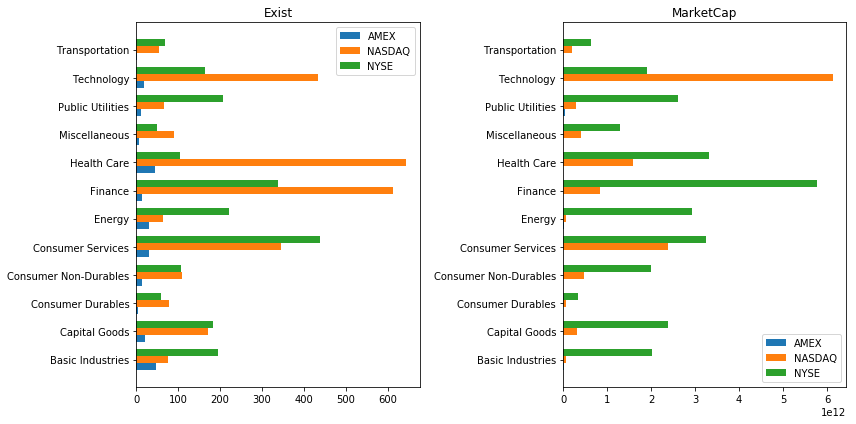

In [9]:
plt.figure(1, figsize=(12, 6))
for k in range( len(x0.index.levels[0].values) ):
    e = x0.index.levels[0].values[k]
    x = x0.loc[e]
    for i in range(len(x.columns)):
        plt.subplot(1,2,i+1)
        plt.barh( np.arange(len(x))+k*0.25, x[x.columns[i]].values, height=0.25)

        if k==2:
            plt.yticks(np.arange(len(x))+0.25, x.index.values)
            plt.title(x.columns[i])
            plt.legend(x0.index.levels[0].values, loc='best')
            
plt.tight_layout()
plt.show()

In [10]:
x = ss.groupby('IPOyear').sum()[ ['Exist', 'MarketCap'] ]
x

,Exist,MarketCap
IPOyear,,
1972.0,4,5.600379e+10
1973.0,1,1.680000e+09
1980.0,2,8.501800e+11
1981.0,5,1.619762e+10
1982.0,4,3.121320e+09
1983.0,11,1.760993e+11
1984.0,4,3.355009e+10
1985.0,3,3.900841e+10
1986.0,37,1.125805e+12


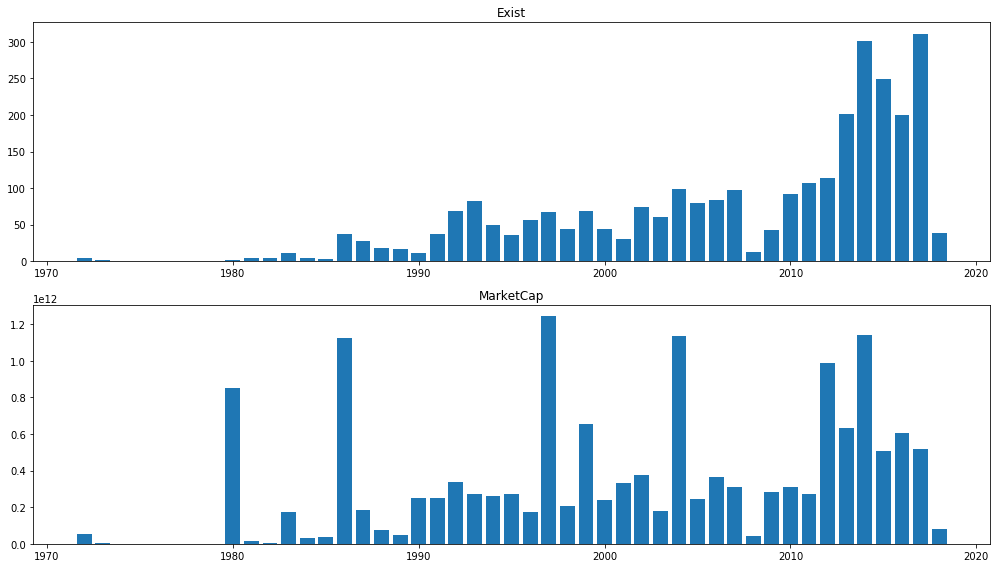

In [11]:
plt.figure(1, figsize=(14, 8))
for i in range(len(x.columns)):
    plt.subplot(2,1,i+1)
    plt.bar( x.index.values, x[x.columns[i]].values)
    #plt.yticks(range(len(x)), x.index.values)
    plt.title(x.columns[i])

plt.tight_layout()
plt.show()


In [12]:
ss = ss.replace(to_replace='---', value=np.nan)
ss['Start_date'] = pd.to_datetime(ss['Start_date'])
ss['End_date'] = pd.to_datetime(ss['End_date'])
ss[11:17]

,Exchange,Symbol,Name,Exist,LastSale,MarketCap,IPOyear,Sector,industry,Start_date,End_date
11,NASDAQ,ABCB,Ameris Bancorp,1,52.600,1.970000e+09,1994.0,Finance,Major Banks,1994-05-19,2018-02-16
12,NASDAQ,ABCD,"Cambium Learning Group, Inc.",1,7.190,3.355600e+08,NaN,Consumer Services,Publishing,2009-12-09,2018-02-16
13,NASDAQ,ABDC,Alcentra Capital Corp.,1,7.585,1.080500e+08,NaN,NaN,NaN,2014-05-09,2018-02-16
14,NASDAQ,ABEO,Abeona Therapeutics Inc.,1,11.900,5.566300e+08,NaN,Health Care,Major Pharmaceuticals,1980-09-19,2018-02-16
15,NASDAQ,ABEOW,Abeona Therapeutics Inc.,0,7.200,NaN,NaN,Health Care,Major Pharmaceuticals,NaT,NaT
16,NASDAQ,ABIL,Ability Inc.,1,0.381,9.810000e+06,2014.0,Finance,Business Services,2014-02-05,2018-02-16


In [13]:
ss['Start_year'] = ss['Start_date'].dt.to_period('Y')
ss[11:17]

,Exchange,Symbol,Name,Exist,LastSale,MarketCap,IPOyear,Sector,industry,Start_date,End_date,Start_year
11,NASDAQ,ABCB,Ameris Bancorp,1,52.600,1.970000e+09,1994.0,Finance,Major Banks,1994-05-19,2018-02-16,1994
12,NASDAQ,ABCD,"Cambium Learning Group, Inc.",1,7.190,3.355600e+08,NaN,Consumer Services,Publishing,2009-12-09,2018-02-16,2009
13,NASDAQ,ABDC,Alcentra Capital Corp.,1,7.585,1.080500e+08,NaN,NaN,NaN,2014-05-09,2018-02-16,2014
14,NASDAQ,ABEO,Abeona Therapeutics Inc.,1,11.900,5.566300e+08,NaN,Health Care,Major Pharmaceuticals,1980-09-19,2018-02-16,1980
15,NASDAQ,ABEOW,Abeona Therapeutics Inc.,0,7.200,NaN,NaN,Health Care,Major Pharmaceuticals,NaT,NaT,NaT
16,NASDAQ,ABIL,Ability Inc.,1,0.381,9.810000e+06,2014.0,Finance,Business Services,2014-02-05,2018-02-16,2014


In [14]:
x = ss.groupby('Start_year').sum()[ ['Exist', 'MarketCap'] ]
x

,Exist,MarketCap
Start_year,,
1962,9,9.597600e+11
1970,24,1.987643e+12
1972,22,1.741620e+12
1973,26,3.153224e+11
1974,1,5.972000e+10
1975,1,2.964000e+07
1976,1,1.983900e+11
1977,10,6.572432e+11
1978,3,6.463497e+10


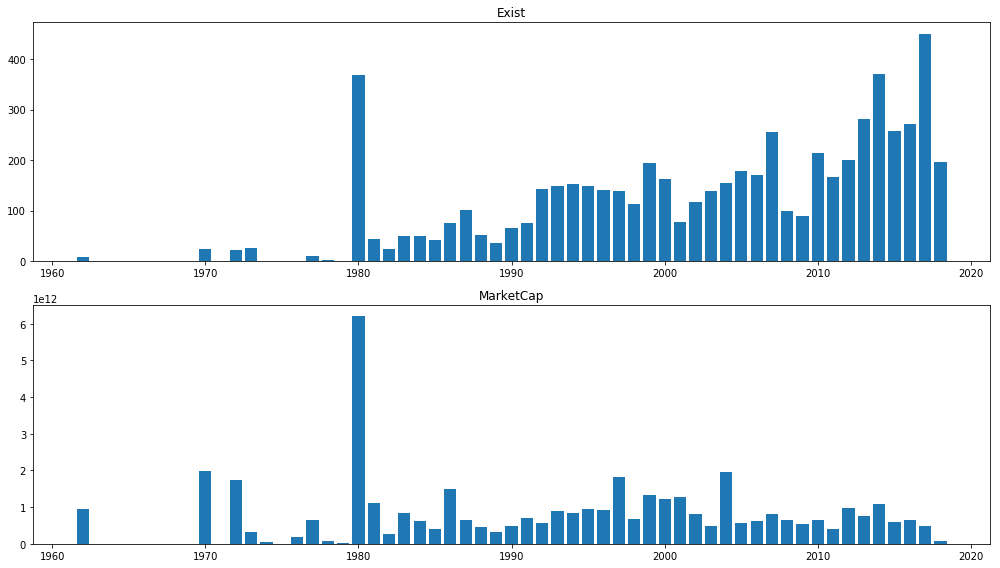

In [15]:
plt.figure(1, figsize=(14, 8))
for i in range(len(x.columns)):
    plt.subplot(2,1,i+1)
    plt.bar( x.index.astype(int)+1970, x[x.columns[i]].values)
    #plt.yticks(range(len(x)), x.index.values)
    plt.title(x.columns[i])

plt.tight_layout()
plt.show()


/home/oscar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


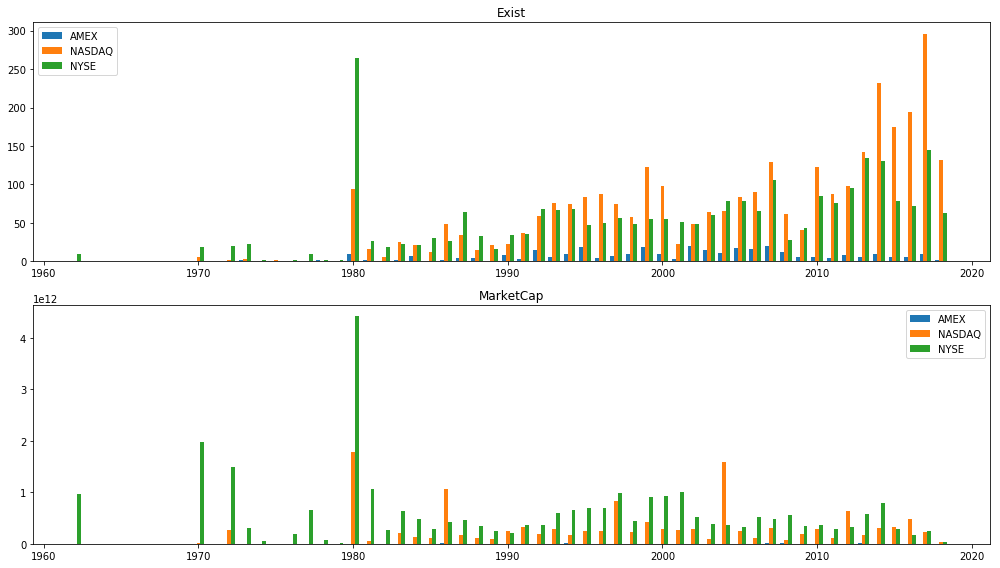

In [16]:
x0 = ss.groupby(['Exchange','Start_year'] ).sum()[  ['Exist', 'MarketCap'] ]
plt.figure(1, figsize=(14, 8))
for k in range( len(x0.index.levels[0].values) ):
    e = x0.index.levels[0].values[k]
    x = x0.loc[e]
    for i in range(len(x.columns)):
        plt.subplot(2,1,i+1)
        plt.bar( x.index.astype(int)+1970+(k-1)*0.25, x[x.columns[i]].values, width=0.25)
        if k==2:
            plt.title(x.columns[i])
            plt.legend(x0.index.levels[0].values, loc='best')
            
plt.tight_layout()
plt.show()

In [17]:
ss.shape

(6791, 12)

In [18]:
ss.sort_values('MarketCap', ascending=False).head(10)

,Exchange,Symbol,Name,Exist,LastSale,MarketCap,IPOyear,Sector,industry,Start_date,End_date,Start_year
5,NASDAQ,AAPL,Apple Inc.,1,164.34,8.338600e+11,1980.0,Technology,Computer Manufacturing,1980-12-12,2018-02-16,1980
1325,NASDAQ,GOOGL,Alphabet Inc.,1,1054.14,7.329400e+11,NaN,Technology,"Computer Software: Programming, Data Processing",2004-08-19,2018-02-16,2004
1324,NASDAQ,GOOG,Alphabet Inc.,1,1052.10,7.315200e+11,2004.0,Technology,"Computer Software: Programming, Data Processing",2004-08-19,2018-02-16,2004
1994,NASDAQ,MSFT,Microsoft Corporation,1,89.83,6.916700e+11,1986.0,Technology,Computer Software: Prepackaged Software,1986-03-13,2018-02-16,1986
176,NASDAQ,AMZN,"Amazon.com, Inc.",1,1414.51,6.847700e+11,1997.0,Consumer Services,Catalog/Specialty Distribution,1997-05-15,2018-02-16,1997
1059,NASDAQ,FB,"Facebook, Inc.",1,173.15,5.030000e+11,2012.0,Technology,"Computer Software: Programming, Data Processing",2012-05-18,2018-02-16,2012
3573,NYSE,BABA,Alibaba Group Holding Limited,1,179.25,4.599300e+11,2014.0,Miscellaneous,Business Services,2014-09-19,2018-02-16,2014
4861,NYSE,JPM,J P Morgan Chase & Co,1,112.43,3.851100e+11,NaN,Finance,Major Banks,1980-03-17,2018-02-16,1980
4853,NYSE,JNJ,Johnson & Johnson,1,129.96,3.491400e+11,NaN,Health Care,Major Pharmaceuticals,1970-01-02,2018-02-16,1970
6404,NYSE,XOM,Exxon Mobil Corporation,1,76.30,3.234400e+11,NaN,Energy,Integrated oil Companies,1970-01-02,2018-02-16,1970


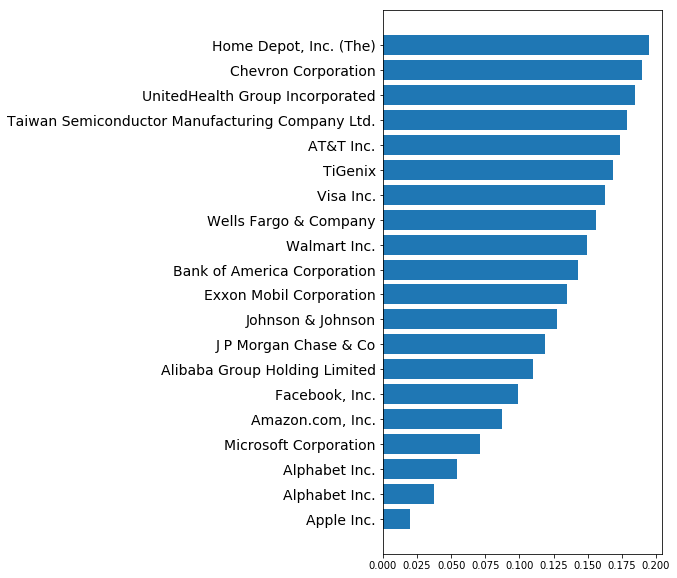

In [19]:
ntop = 20
tops = ss.sort_values('MarketCap', ascending=False).head(ntop)['Name']
topp = ss.sort_values('MarketCap', ascending=False).head(ntop)['MarketCap']
topp = np.cumsum(topp)/ss['MarketCap'].sum()

plt.figure(1, figsize=(5,10))
plt.barh(range(ntop), topp)
plt.yticks(range(ntop), tops, fontsize=14)
plt.show()

In [90]:
x = ss[ss['Sector']=='Technology'].describe()
x.loc[:,:]

,Exist,LastSale,MarketCap,IPOyear
count,618.000000,618.000000,6.110000e+02,393.000000
mean,0.996764,39.467854,1.314114e+10,2005.653944
std,0.056842,72.429131,6.703418e+10,9.854935
min,0.000000,0.281000,1.436960e+05,1972.000000
25%,1.000000,6.727500,1.818250e+08,1997.000000
50%,1.000000,20.935000,1.150000e+09,2009.000000
75%,1.000000,47.240000,4.830000e+09,2014.000000
max,1.000000,1054.140000,8.338600e+11,2018.000000


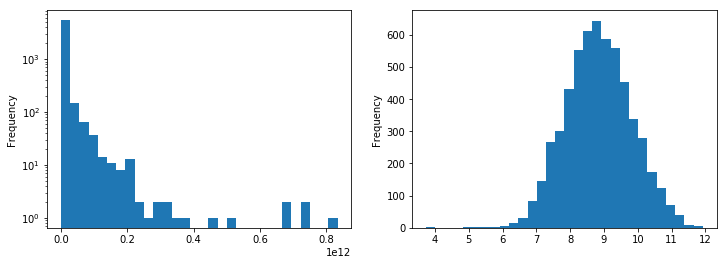

In [66]:
x = ss['MarketCap']

plt.figure(1, figsize=(12,4))
plt.subplot(1,2,1)
x.plot.hist(bins=30, logy=True)

plt.subplot(1,2,2)
x = np.log(x)/np.log(10.0)
x.plot.hist(bins=30)

plt.show()

In [79]:
ss['Sector'] = ss['Sector'].astype('category')
ss['Sector'].cat.categories

Index(['Basic Industries', 'Capital Goods', 'Consumer Durables',
       'Consumer Non-Durables', 'Consumer Services', 'Energy', 'Finance',
       'Health Care', 'Miscellaneous', 'Public Utilities', 'Technology',
       'Transportation'],
      dtype='object')

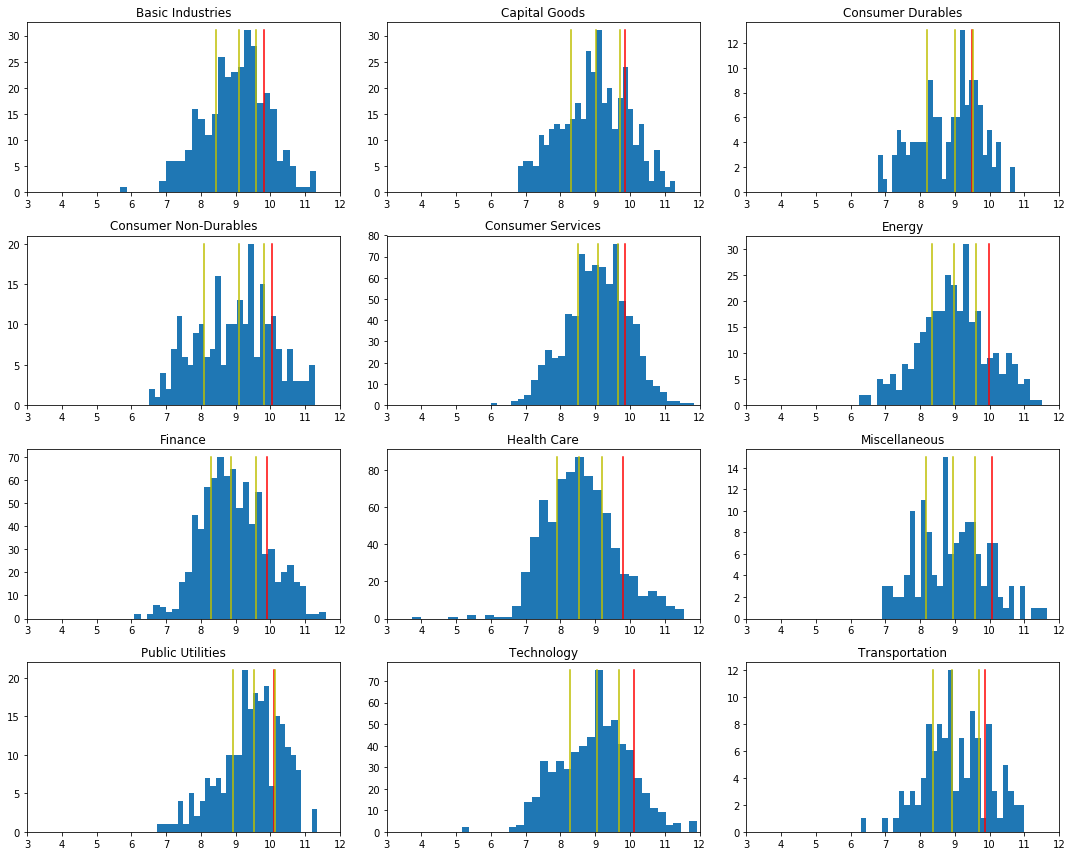

In [133]:
plt.figure(1, figsize=(15,12))
seclist = ss['Sector'].cat.categories
for i in range(len(seclist)):
    ax = plt.subplot(4,3,i+1)
    x = ss[ss['Sector']==seclist[i]]['MarketCap'].dropna()
    xdes = x.describe()
    x = np.log(x)/np.log(10.0)
    n, bins, pack = plt.hist(np.array(x.astype('float64')), bins=30)
    plt.plot([np.log(xdes.loc['mean'])/np.log(10.0)]*2, [0, max(n)], 'r')
    plt.plot([np.log(xdes.loc['25%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['50%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['75%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    ax.set_xlim([3,12])
    plt.title(seclist[i])
plt.tight_layout()
plt.show()

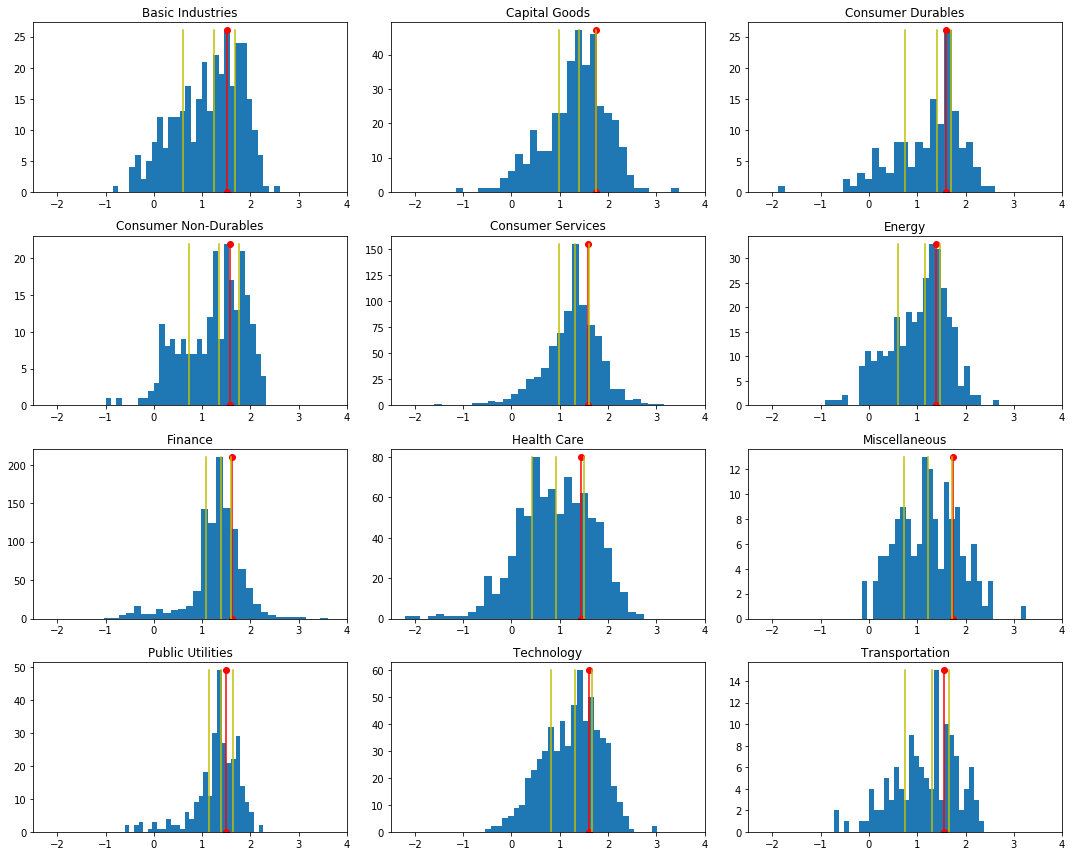

In [139]:
plt.figure(1, figsize=(15,12))
seclist = ss['Sector'].cat.categories
for i in range(len(seclist)):
    ax = plt.subplot(4,3,i+1)
    x = ss[ss['Sector']==seclist[i]]['LastSale'].dropna()
    xdes = x.describe()
    x = np.log(x)/np.log(10.0)
    n, bins, pack = plt.hist(np.array(x), bins=30)
    plt.plot([np.log(xdes.loc['mean'])/np.log(10.0)]*2, [0, max(n)], 'r-o')
    plt.plot([np.log(xdes.loc['25%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['50%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['75%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    ax.set_xlim([-2.5, 4])
    #plt.axis([-2.5,4,0,220])
    plt.title(seclist[i])
plt.tight_layout()
plt.show()

In [146]:
ss.sort_values('LastSale', ascending=False).head(10)

,Exchange,Symbol,Name,Exist,LastSale,MarketCap,IPOyear,Sector,industry,Start_date,End_date,Start_year
6731,AMEX,SEB,Seaboard Corporation,1,4021.240,4.710000e+09,1996.0,Finance,Investment Bankers/Brokers/Service,1980-03-17,2018-02-16,1980
5389,NYSE,NVR,"NVR, Inc.",1,2915.020,1.076000e+10,NaN,Capital Goods,Homebuilding,1985-07-22,2018-02-16,1985
2282,NASDAQ,PCLN,The Priceline Group Inc.,1,1797.860,8.768000e+10,1999.0,Miscellaneous,Business Services,1999-03-31,2018-02-16,1999
176,NASDAQ,AMZN,"Amazon.com, Inc.",1,1414.510,6.847700e+11,1997.0,Consumer Services,Catalog/Specialty Distribution,1997-05-15,2018-02-16,1997
1377,NASDAQ,HBANP,Huntington Bancshares Incorporated,1,1321.000,NaN,NaN,Finance,Major Banks,2008-04-17,2018-02-16,2008
6323,NYSE,WFC^L,Wells Fargo & Company,0,1267.691,NaN,NaN,NaN,NaN,NaT,NaT,NaT
3582,NYSE,BAC^L,Bank of America Corporation,0,1236.000,NaN,NaN,NaN,NaN,NaT,NaT,NaT
5124,NYSE,MKL,Markel Corporation,1,1097.520,1.525000e+10,1986.0,Finance,Property-Casualty Insurers,1986-12-12,2018-02-16,1986
3811,NYSE,CCI^A,Crown Castle International Corporation,0,1079.760,NaN,NaN,NaN,NaN,NaT,NaT,NaT
1325,NASDAQ,GOOGL,Alphabet Inc.,1,1054.140,7.329400e+11,NaN,Technology,"Computer Software: Programming, Data Processing",2004-08-19,2018-02-16,2004


In [147]:
ss.sort_values('LastSale', ascending=True).head(10)

,Exchange,Symbol,Name,Exist,LastSale,MarketCap,IPOyear,Sector,industry,Start_date,End_date,Start_year
791,NASDAQ,CYHHZ,"Community Health Systems, Inc.",1,0.0061,NaN,NaN,Health Care,Hospital/Nursing Management,2018-02-16,2018-02-16,2018
25,NASDAQ,ACERW,Acer Therapeutics Inc.,0,0.0100,NaN,NaN,Health Care,Major Pharmaceuticals,NaT,NaT,NaT
1629,NASDAQ,JASNW,"Jason Industries, Inc.",0,0.0129,NaN,2013.0,Consumer Durables,Miscellaneous manufacturing industries,NaT,NaT,NaT
799,NASDAQ,CYTXW,Cytori Therapeutics Inc,0,0.0250,NaN,NaN,Health Care,Medical/Dental Instruments,NaT,NaT,NaT
3186,NASDAQ,WHLRW,"Wheeler Real Estate Investment Trust, Inc.",0,0.0252,NaN,NaN,Consumer Services,Real Estate Investment Trusts,NaT,NaT,NaT
2209,NASDAQ,ONSIZ,"Oncobiologics, Inc.",1,0.0329,NaN,2016.0,Health Care,Biotechnology: Biological Products (No Diagnos...,2018-02-02,2018-02-16,2018
2208,NASDAQ,ONSIW,"Oncobiologics, Inc.",0,0.0350,NaN,2016.0,Health Care,Biotechnology: Biological Products (No Diagnos...,NaT,NaT,NaT
2127,NASDAQ,NUROW,"NeuroMetrix, Inc.",0,0.0416,NaN,NaN,Health Care,Medical/Dental Instruments,NaT,NaT,NaT
1921,NASDAQ,MICTW,"Micronet Enertec Technologies, Inc.",0,0.0700,NaN,NaN,Capital Goods,Electrical Products,NaT,NaT,NaT
1043,NASDAQ,EYEGW,"Eyegate Pharmaceuticals, Inc.",0,0.0800,NaN,NaN,Health Care,Major Pharmaceuticals,NaT,NaT,NaT


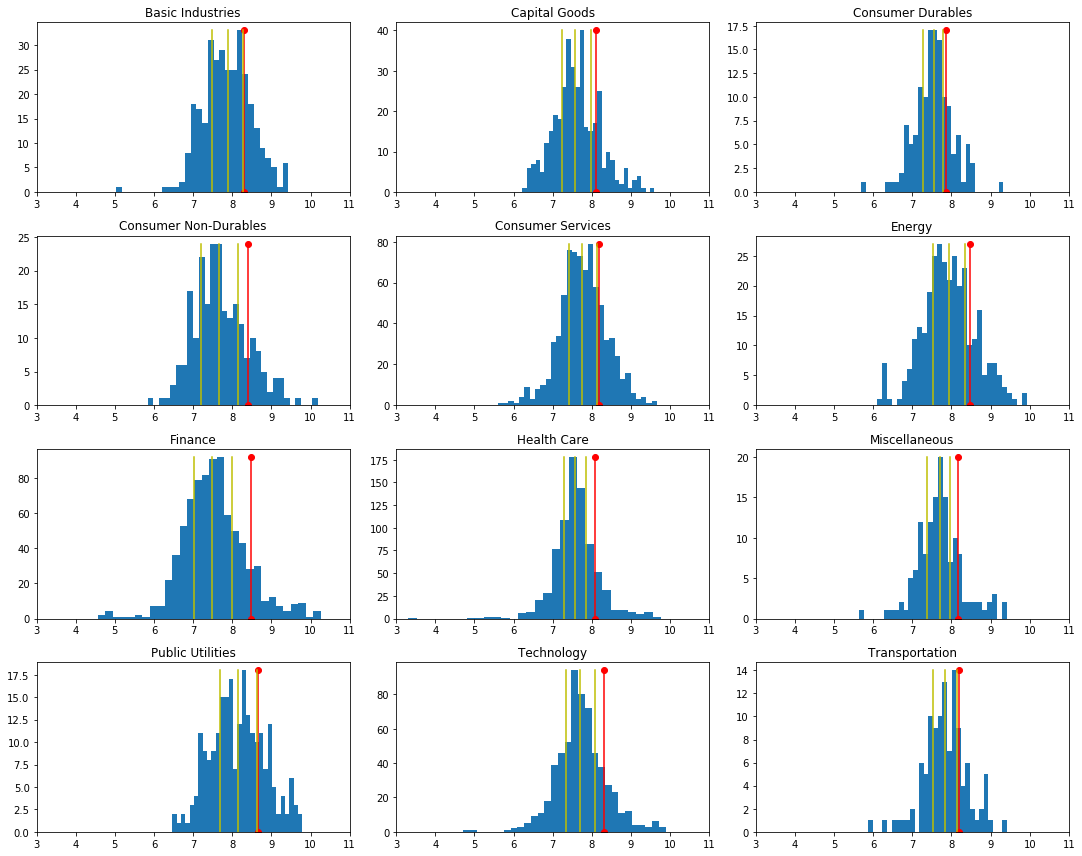

In [150]:
plt.figure(1, figsize=(15,12))
seclist = ss['Sector'].cat.categories
for i in range(len(seclist)):
    ax = plt.subplot(4,3,i+1)
    x = (ss[ss['Sector']==seclist[i]]['MarketCap'] / ss[ss['Sector']==seclist[i]]['LastSale']).dropna()
    xdes = x.describe()
    x = np.log(x)/np.log(10.0)
    n, bins, pack = plt.hist(np.array(x), bins=30)
    plt.plot([np.log(xdes.loc['mean'])/np.log(10.0)]*2, [0, max(n)], 'r-o')
    plt.plot([np.log(xdes.loc['25%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['50%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    plt.plot([np.log(xdes.loc['75%'])/np.log(10.0)]*2, [0, max(n)], 'y')
    ax.set_xlim([3, 11])
    #plt.axis([-2.5,4,0,220])
    plt.title(seclist[i])
plt.tight_layout()
plt.show()

In [167]:
x = ss[ss['Sector'] == 'Finance'].groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('Exist', ascending=False)

,Exist,MarketCap,mean_cap
industry,,,
Major Banks,336,2.618869e+12,7.794254e+09
Business Services,95,1.440299e+10,1.516104e+08
Property-Casualty Insurers,95,4.531487e+11,4.769986e+09
Savings Institutions,73,2.658586e+11,3.641899e+09
Finance: Consumer Services,69,3.154542e+11,4.571800e+09
Investment Bankers/Brokers/Service,62,6.894026e+11,1.111940e+10
Commercial Banks,47,1.287812e+12,2.740026e+10
Investment Managers,47,2.108067e+11,4.485249e+09
Real Estate,45,8.809450e+10,1.957656e+09


In [168]:
x = ss[ss['Sector'] == 'Technology'].groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('Exist', ascending=False)

,Exist,MarketCap,mean_cap
industry,,,
Computer Software: Prepackaged Software,145,1.814322e+12,1.251257e+10
EDP Services,117,5.489787e+11,4.692126e+09
Semiconductors,106,1.233816e+12,1.163977e+10
Industrial Machinery/Components,42,2.888637e+11,6.877708e+09
"Computer Software: Programming, Data Processing",39,2.250563e+12,5.770673e+10
Radio And Television Broadcasting And Communications Equipment,37,3.114814e+11,8.418417e+09
Diversified Commercial Services,24,4.532412e+10,1.888505e+09
Professional Services,19,3.099267e+10,1.631193e+09
Computer peripheral equipment,17,4.295734e+10,2.526902e+09


In [165]:
x = ss[ss['Sector'] == 'Consumer Services'].groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('Exist', ascending=False)

,Exist,MarketCap,mean_cap
industry,,,
Real Estate Investment Trusts,236,1.018265e+12,4.314683e+09
Other Consumer Services,64,1.502352e+11,2.347425e+09
Restaurants,59,3.380942e+11,5.730409e+09
Other Specialty Stores,38,1.734731e+11,4.565081e+09
Clothing/Shoe/Accessory Stores,35,1.468454e+11,4.195583e+09
Hotels/Resorts,33,2.851778e+11,8.641751e+09
Television Services,32,8.803321e+11,2.751038e+10
Broadcasting,28,8.240074e+10,2.942884e+09
Marine Transportation,27,2.109516e+11,7.813021e+09


In [169]:
x = ss[ss['Sector'] == 'Health Care'].groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('Exist', ascending=False)

,Exist,MarketCap,mean_cap
industry,,,
Major Pharmaceuticals,409,2.699298e+12,6.599751e+09
Medical/Dental Instruments,95,4.381719e+11,4.612336e+09
Biotechnology: Biological Products (No Diagnostic Substances),94,4.205250e+11,4.473671e+09
Medical Specialities,34,5.251433e+11,1.544539e+10
Hospital/Nursing Management,29,1.224976e+11,4.224054e+09
Biotechnology: Electromedical & Electrotherapeutic Apparatus,28,1.349386e+11,4.819235e+09
Industrial Specialties,26,1.487959e+11,5.722921e+09
Biotechnology: Commercial Physical & Biological Resarch,24,8.162164e+10,3.400902e+09
Biotechnology: In Vitro & In Vivo Diagnostic Substances,22,2.852375e+10,1.296534e+09


In [172]:
x = ss.groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('MarketCap', ascending=False).head(30)

,Exist,MarketCap,mean_cap
industry,,,
Major Pharmaceuticals,409,2.699298e+12,6.599751e+09
Major Banks,336,2.618869e+12,7.794254e+09
"Computer Software: Programming, Data Processing",39,2.250563e+12,5.770673e+10
Computer Software: Prepackaged Software,145,1.814322e+12,1.251257e+10
Telecommunications Equipment,136,1.624661e+12,1.194604e+10
Business Services,183,1.610378e+12,8.799880e+09
Commercial Banks,47,1.287812e+12,2.740026e+10
Semiconductors,106,1.233816e+12,1.163977e+10
Integrated oil Companies,23,1.154150e+12,5.018043e+10


In [173]:
x = ss.groupby(['industry']).sum()[['Exist','MarketCap']]
x['mean_cap'] = x['MarketCap'] / x['Exist']
x.sort_values('MarketCap', ascending=True).head(30)

,Exist,MarketCap,mean_cap
industry,,,
Diversified Electronic Products,1,6.470000e+06,6.470000e+06
Consumer: Greeting Cards,1,1.806600e+08,1.806600e+08
Tobacco,1,4.141600e+08,4.141600e+08
Other Transportation,1,5.759600e+08,5.759600e+08
Precision Instruments,1,5.910100e+08,5.910100e+08
Finance/Investors Services,7,6.989900e+08,9.985571e+07
Miscellaneous,6,9.568200e+08,1.594700e+08
Wholesale Distributors,2,1.005750e+09,5.028750e+08
General Bldg Contractors - Nonresidential Bldgs,1,1.110000e+09,1.110000e+09


In [180]:
ss[ss['industry'] == 'Major Banks'].sort_values('MarketCap', ascending=False).head(10)

,Exchange,Symbol,Name,Exist,LastSale,MarketCap,IPOyear,Sector,industry,Start_date,End_date,Start_year
4861,NYSE,JPM,J P Morgan Chase & Co,1,112.43,3.851100e+11,NaN,Finance,Major Banks,1980-03-17,2018-02-16,1980
3574,NYSE,BAC,Bank of America Corporation,1,31.18,3.207600e+11,NaN,Finance,Major Banks,1980-03-17,2018-02-16,1980
6320,NYSE,WFC,Wells Fargo & Company,1,58.00,2.837100e+11,NaN,Finance,Major Banks,1972-06-01,2018-02-16,1972
3769,NYSE,C,Citigroup Inc.,1,75.18,1.932000e+11,NaN,Finance,Major Banks,1977-01-03,2018-02-16,1977
4800,NYSE,ITUB,Itau Unibanco Banco Holding SA,1,15.65,1.013700e+11,NaN,Finance,Major Banks,2002-02-25,2018-02-16,2002
6207,NYSE,USB,U.S. Bancorp,1,54.14,8.984000e+10,NaN,Finance,Major Banks,1973-05-03,2018-02-16,1973
3705,NYSE,BNS,Bank of Nova Scotia (The),1,61.03,7.322000e+10,NaN,Finance,Major Banks,1999-09-13,2018-02-16,1999
5574,NYSE,PNC,"PNC Financial Services Group, Inc. (The)",1,153.29,7.251000e+10,NaN,Finance,Major Banks,1988-09-07,2018-02-16,1988
3597,NYSE,BBD,Banco Bradesco Sa,1,11.53,7.016000e+10,NaN,Finance,Major Banks,2002-08-02,2018-02-16,2002
6180,NYSE,UBS,UBS AG,1,18.62,6.928000e+10,2014.0,Finance,Major Banks,2000-05-16,2018-02-16,2000


In [182]:
ss[ss['industry'] == 'Computer Software: Programming, Data Processing'].sort_values('MarketCap', 
                                                    ascending=False).head(20)    

,Exchange,Symbol,Name,Exist,LastSale,MarketCap,IPOyear,Sector,industry,Start_date,End_date,Start_year
1325,NASDAQ,GOOGL,Alphabet Inc.,1,1054.14,7.329400e+11,NaN,Technology,"Computer Software: Programming, Data Processing",2004-08-19,2018-02-16,2004
1324,NASDAQ,GOOG,Alphabet Inc.,1,1052.10,7.315200e+11,2004.0,Technology,"Computer Software: Programming, Data Processing",2004-08-19,2018-02-16,2004
1059,NASDAQ,FB,"Facebook, Inc.",1,173.15,5.030000e+11,2012.0,Technology,"Computer Software: Programming, Data Processing",2012-05-18,2018-02-16,2012
352,NASDAQ,BIDU,"Baidu, Inc.",1,225.60,7.833000e+10,2005.0,Technology,"Computer Software: Programming, Data Processing",2005-08-05,2018-02-16,2005
3168,NASDAQ,WB,Weibo Corporation,1,129.66,2.835000e+10,2014.0,Technology,"Computer Software: Programming, Data Processing",2014-04-17,2018-02-16,2014
6164,NYSE,TWTR,"Twitter, Inc.",1,33.44,2.484000e+10,2013.0,Technology,"Computer Software: Programming, Data Processing",2013-11-07,2018-02-16,2013
5709,NYSE,RHT,"Red Hat, Inc.",1,132.03,2.337000e+10,NaN,Technology,"Computer Software: Programming, Data Processing",1999-08-11,2018-02-16,1999
5883,NYSE,SNAP,Snap Inc.,1,18.58,2.271000e+10,2017.0,Technology,"Computer Software: Programming, Data Processing",2017-03-02,2018-02-16,2017
1553,NASDAQ,INFO,IHS Markit Ltd.,1,45.30,1.802000e+10,1996.0,Technology,"Computer Software: Programming, Data Processing",2014-06-19,2018-02-16,2014
3260,NASDAQ,YNDX,Yandex N.V.,1,37.42,1.219000e+10,2011.0,Technology,"Computer Software: Programming, Data Processing",2011-05-24,2018-02-16,2011
